# BT3041 Assignment 1: Question 2
## UTKARSH KUMAR : ME17B123

In [28]:
#loading all the necessary libraries
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame
import numpy as np
import pandas as pd
import math

In [29]:
#reading the CSV data and figuring out by printing a few of its entries 
X= pd.read_csv('Clustering_gmm.csv')
X.tail()

,Weight,Height
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875
499,60.224392,169.689709


<AxesSubplot:xlabel='Weight', ylabel='Height'>

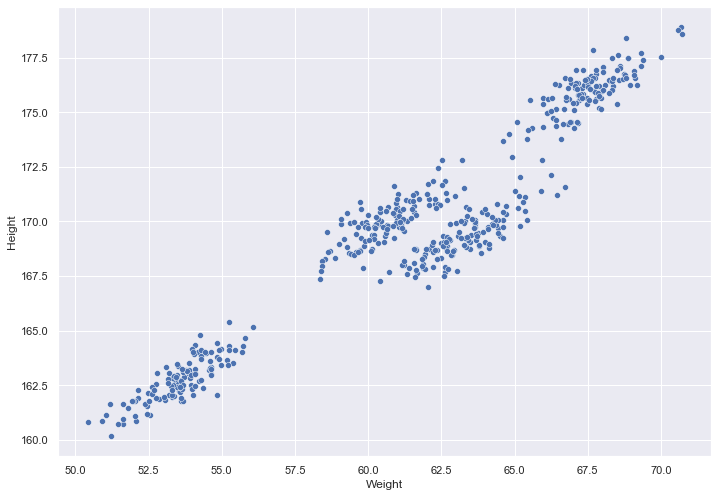

In [30]:
#using seaborn plots for plotting the points in this code
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)}) # for setting the dimesnions of the plot
sns.scatterplot(data=X, x='Weight',y='Height') #for printing the Weight vs  Height plot

In [31]:
x_coords=X['Weight']
y_coords=X['Height']
#sns.scatterplot(x_coords,y_coords)
#type(x_coords)

In [32]:
x=x_coords
y=y_coords

## Clustering Algorithm

In [33]:
# Function to cluster the points, searches for neighbors and adds them to the cluster
def dbscan(minpts, eps):
    labels = [0] * len(x_coords) # List for predicted cluster
    curr_clus_label = 0

    for point in range(len(x_coords)):
        if not labels[point] == 0:
            continue

        neighbors = findNeighbors(point, eps)

        if len(neighbors) < minpts:
            labels[point] = -1
        else:
            curr_clus_label += 1
            labels = create_cluster(point, neighbors, curr_clus_label, eps, minpts, labels) 
    return labels

In [34]:
# Function to find neighbors of the point input. Finds all the neighbors and adds them to the current 
# ongoing cluster. Stops when no more unique neighbors exist
def create_cluster(point, neighbors, curr_clus_label, eps, minpts, labels):
    labels[point] = curr_clus_label

    i = 0
    while i < len(neighbors):
        next_neighbor = neighbors[i]

        if labels[next_neighbor] == -1:
            labels[next_neighbor] = curr_clus_label
        
        elif labels[next_neighbor] == 0:
            labels[next_neighbor] = curr_clus_label
            next_neighbor_points = findNeighbors(next_neighbor, eps)

            if len(next_neighbor_points) >= minpts:
                for pts in next_neighbor_points:
                    if pts not in neighbors and pts != point:
                        neighbors.append(pts)
        i += 1
    return labels

In [35]:
# Function to calculate distance between the set of points provided as argument and classify whether they are neighbors
# or not under the current criteria
def findNeighbors(point, eps):
    neighbors = []

    for i in range(len(x_coords)):
      
        dist = math.sqrt(((x_coords[point] - x_coords[i]) ** 2) + ((y_coords[point] - y_coords[i]) ** 2))
        if dist < eps and dist > 0:
            neighbors.append(i) 
    return neighbors

[Text(0.5, 1.0, 'Q2. PLOT OF CLUSTERS (using DBSCAN)'),
 Text(0.5, 0, 'WEIGHT'),
 Text(0, 0.5, 'HEIGHT')]

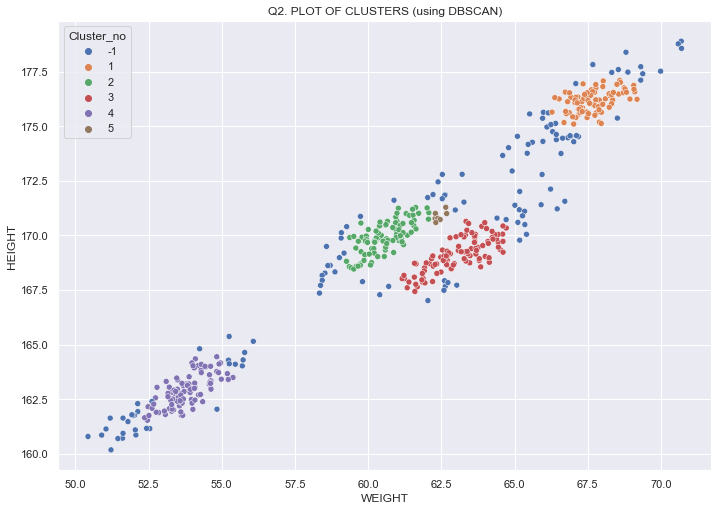

In [36]:
clustering = dbscan(minpts=10,eps=0.5)
#print(clustering)
#sns.scatterplot(data=clustering,x='x_coords',y='y_coords')#, hue="Cluster_no", palette="deep")
X['Cluster_no']=clustering
#X.head()
#sns.scatterplot(data=X[X['Cluster_no']==0],x='Weight',y='Height')
sns.scatterplot(data=X, x='Weight',y='Height', hue="Cluster_no", palette="deep").set(title='Q2. PLOT OF CLUSTERS (using DBSCAN)', xlabel='WEIGHT', ylabel='HEIGHT')

### NUMBER OF POINTS IN EACH CLUSTER

In [37]:
for i in range (1,6):
    print("The number of points in the %ith cluster are %d " %(i,len(X[X['Cluster_no']==i])))

The number of points in the 1th cluster are 83 
The number of points in the 2th cluster are 91 
The number of points in the 3th cluster are 101 
The number of points in the 4th cluster are 95 
The number of points in the 5th cluster are 7 


The above results show all the clusters and the number of points in each of the cluster. We see that the 4th cluster has the lowest number of points in it.  

In [38]:
#test=points(minpts=10,eps=0.5)
#print(test)

### ALGORITHM FOR CLASSIFICATION OF POINTS 

In [41]:
minpts=10
eps=0.5
point_dummy=np.zeros(shape=(500,1))
for i in range (len(x)):
    c=0
    for j in range (len(x)):
        distance = math.dist((x[i],y[i]),(x[j],y[j]))
        if(distance<=eps):
            c+=1
    if(c>=(minpts+1)):
        point_dummy[i]=[1]  #core
       
    elif(c>1 and c<=minpts):
        point_dummy[i]=[2]  #boundary
        
    else:
        point_dummy[i]=[0]   #noise
        

In [42]:
X['Point_type']=point_dummy


<AxesSubplot:xlabel='Weight', ylabel='Height'>

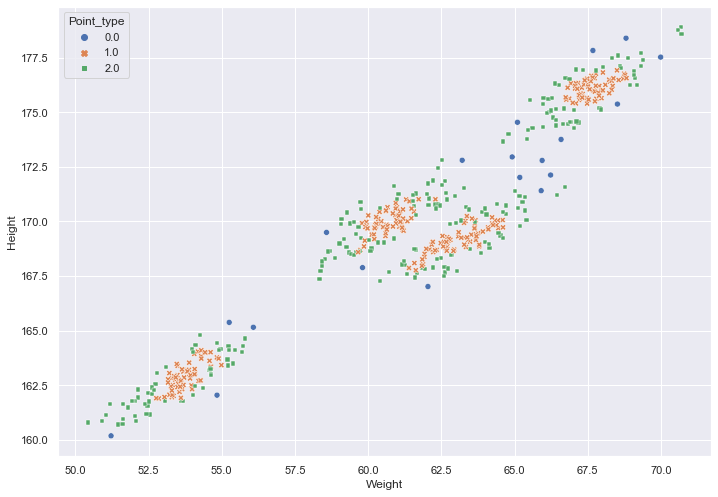

In [43]:
sns.scatterplot(data=X,x='Weight',y='Height', hue="Point_type", style="Point_type",palette="deep")

## OUTLIERS

In [44]:
X[X['Point_type']==0]


,Weight,Height,Cluster_no,Point_type
1,68.804094,178.388669,-1,0.0
97,69.985753,177.522585,-1,0.0
140,67.673628,177.825299,-1,0.0
150,56.078781,165.152797,-1,0.0
182,64.916897,172.951507,-1,0.0
209,66.228305,172.123237,-1,0.0
212,66.585917,173.752915,-1,0.0
265,65.097324,174.539183,-1,0.0
292,51.218957,160.182164,-1,0.0
337,62.040668,167.018251,-1,0.0


## CORE POINTS


In [ ]:
X[X['Point_type']==1]

## BOUNDARY POINTS 

In [ ]:
X[X['Point_type']==2]

## NOISE POINTS

In [ ]:
print("The number of noise points in the above data are ",len(X[X['Cluster_no']==-1]))
X[X['Cluster_no']==-1]